In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
import requests

In [2]:
path = 'zomato.csv'

In [3]:
df = pd.read_csv(path, encoding = 'ISO-8859-1')

In [4]:
test = df.copy()

#checking that no Retaurant ID is repeating
size = test.shape[0]
temp = test['Restaurant ID'].value_counts()
print(size, temp.shape[0])

9551 9551


In [5]:
#checking nan is not presnt in this
test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#selecting India Country 
#country Code of India is 1
test = test[test['Country Code'] == 1]

#setting the index
test.reset_index(inplace = True, drop = True)

In [7]:
#checking no nan value is present for india country
test.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#list of cities in Delhi NCR
Delhi_NCR_list = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']

In [9]:
#filtering cities other than Delh NCR
Rest_Of_India = test[(test['City'] != Delhi_NCR_list[0]) & (test['City'] != Delhi_NCR_list[1]) & (test['City'] != Delhi_NCR_list[2]) 
                 & (test['City'] != Delhi_NCR_list[3]) & (test['City'] != Delhi_NCR_list[4])]
Rest_Of_India.reset_index(drop = True, inplace = True)

In [10]:
#filtering Delhi NCR Cities
Delhi_NCR = test[(test['City'] == Delhi_NCR_list[0]) | (test['City'] == Delhi_NCR_list[1]) | (test['City'] == Delhi_NCR_list[2]) 
                 | (test['City'] == Delhi_NCR_list[3]) | (test['City'] == Delhi_NCR_list[4])]
Delhi_NCR.reset_index(drop = True, inplace = True)

## Question 1.1

Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [11]:
#finding the number of rows as it shows the number of restaurants
No_Of_Restaurant_Delhi_NCR = Delhi_NCR.shape[0]
No_Of_Restaurant_Rest_Of_India = Rest_Of_India.shape[0]

In [12]:
#making lists to pass in bar graph function
group = ['Delhi NCR', 'Rest Of India']
NO_OF_Restaurants = [No_Of_Restaurant_Delhi_NCR, No_Of_Restaurant_Rest_Of_India]

In [13]:
print("No. of restaurants in Delhi NCR is",No_Of_Restaurant_Delhi_NCR)
print("No. of restaurants in Rest of India is",No_Of_Restaurant_Rest_Of_India)

No. of restaurants in Delhi NCR is 7947
No. of restaurants in Rest of India is 705


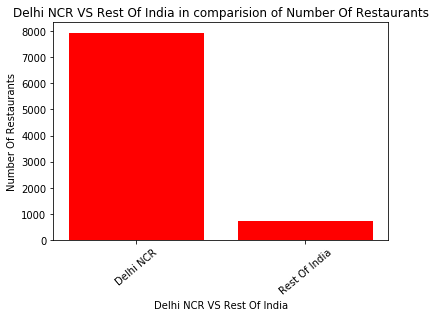

In [14]:
#bar Graph
plt.bar(group, NO_OF_Restaurants, color = ['Red'], width = 0.8)
plt.xlabel("Delhi NCR VS Rest Of India")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Restaurants")
plt.title("Delhi NCR VS Rest Of India in comparision of Number Of Restaurants")
plt.show()

## Question 1.2

Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [15]:
#using Dataset
dict_Delhi_NCR = {}      #dictionary to hold the cuisines in Delhi NCR
dict_Rest_Of_India = {}      #dictionary to hold the cuisines in Rest Of India

In [16]:
#Building dict_Delhi_NCR
for i in range(No_Of_Restaurant_Delhi_NCR):
    Cuisines_list = Delhi_NCR['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        dict_Delhi_NCR[ele.strip()] = dict_Delhi_NCR.get(ele.strip(),0);

In [17]:
#Building dict_Rest_Of_India
for i in range(No_Of_Restaurant_Rest_Of_India):
    Cuisines_list = Rest_Of_India['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        dict_Rest_Of_India[ele.strip()] = dict_Rest_Of_India.get(ele.strip(),0);

In [18]:
dict_ans = {}     #store the cuisines which are not present in Delhi NCR but present in Rest Of India
for ele in dict_Rest_Of_India:
    if dict_Delhi_NCR.get(ele) is None:
        dict_ans[ele] = dict_ans.get(ele, 0)

In [19]:
#printing ans on the basis of dataset
for ele in dict_ans:
    print(ele)

German
Malwani
BBQ
Cajun


In [20]:
#Using API
City_id  = 0  #maintain the city id of cities present in Delhi NCR
basic_api='https://developers.zomato.com/api/v2.1'
param={'q' : 'Delhi NCR'}
user_key = "deacdd5cb34d052c59e8491eb2699851"
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
response=requests.get(basic_api+'/cities',headers=header,params=param)
data = response.json()
for ele in data['location_suggestions']:
    if ele['name'] == 'Delhi NCR':
        City_id = ele['id']
        break;
print("City id of Delhi NCR is",City_id)

City id of Delhi NCR is 1


In [21]:
#fetch the cuisines in Delhi NCR
param={'city_id' : City_id}
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
response=requests.get(basic_api+'/cuisines',headers=header,params=param)
data = response.json()
dict_api = {}                    #dictionary store the name of cuisines presnt in Delhi NCR according to API
for ele in data['cuisines']:
    dict_api[ele['cuisine']['cuisine_name']] = dict_api.get(ele['cuisine']['cuisine_name'], 0)

In [22]:
#check whether the information provided by dataset is correct or not
dict_diff = {}               #store the cuisnes name which are not presnt in Delhi NCR according to api and dataset together
for ele in dict_ans:
    if dict_api.get(ele) is None:
        dict_diff[ele] = dict_diff.get(ele, 0)

In [23]:
#prining dictionary or the cuisines which are not served in Delhi NCR on the basis of datset and API
for ele in dict_diff:
    print(ele)

Malwani
Cajun


## Question 1.3 

Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [24]:
cuisines_Delhi_NCR = {}   #maintain the count of cuisines served in different Delhi NCR resturants
for i in range(No_Of_Restaurant_Delhi_NCR):
    Cuisines_list = Delhi_NCR['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        cuisines_Delhi_NCR[ele.strip()] = cuisines_Delhi_NCR.get(ele.strip(),0) + 1;

In [25]:
#printing top 10 Of Delhi NCR Cusinis which are present in most number of restaurants
i = 1
for key, value in sorted(cuisines_Delhi_NCR.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    if i == 10:
        break;
    i += 1

1 North Indian: 3597
2 Chinese: 2448
3 Fast Food: 1866
4 Mughlai: 933
5 Bakery: 697
6 South Indian: 569
7 Continental: 547
8 Desserts: 542
9 Street Food: 538
10 Italian: 535


In [26]:
cuisines_Rest_Of_India = {}   #maintain the count of cuisines served in different Rest_Of_India resturants
for i in range(No_Of_Restaurant_Rest_Of_India):
    Cuisines_list = Rest_Of_India['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        cuisines_Rest_Of_India[ele.strip()] = cuisines_Rest_Of_India.get(ele.strip(),0) + 1;

In [27]:
#printing top 10 Of ROI Cusinis which are present in most number of restaurants
i = 1
x = []
y = []
for key, value in sorted(cuisines_Rest_Of_India.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    y.append(value)
    x.append(key)
    if i == 10:
        break;
    i += 1

1 North Indian: 349
2 Chinese: 242
3 Continental: 177
4 Italian: 147
5 Cafe: 136
6 Fast Food: 97
7 South Indian: 62
8 Mughlai: 59
9 Desserts: 55
10 Mexican: 50


In [28]:
cuisines_India = {}   #maintain the count of cuisines served in different India resturants
for i in range(No_Of_Restaurant_Rest_Of_India + No_Of_Restaurant_Delhi_NCR):
    Cuisines_list = test['Cuisines'][i].split(',')
    for ele in Cuisines_list:
        cuisines_India[ele.strip()] = cuisines_India.get(ele.strip(),0) + 1;

In [29]:
#printing top 10 Of India Cusinis which are present in most number of restaurants
i = 1
x = []
y = []
for key, value in sorted(cuisines_India.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    y.append(value)
    x.append(key)
    if i == 10:
        break;
    i += 1

1 North Indian: 3946
2 Chinese: 2690
3 Fast Food: 1963
4 Mughlai: 992
5 Bakery: 726
6 Continental: 724
7 Italian: 682
8 South Indian: 631
9 Cafe: 627
10 Desserts: 597


## Question 1.4 

Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

1 North Indian: 349
2 Chinese: 242
3 Continental: 177
4 Italian: 147
5 Cafe: 136
6 Fast Food: 97
7 South Indian: 62
8 Mughlai: 59
9 Desserts: 55
10 Mexican: 50


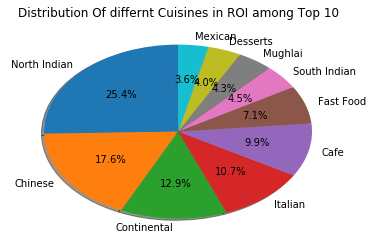

In [30]:
#printing top 10 Of ROI Cusinis which are present in most number of restaurants
i = 1
x = []
y = []
for key, value in sorted(cuisines_Rest_Of_India.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    y.append(value)
    x.append(key)
    if i == 10:
        break;
    i += 1
    
#plot
plt.pie(y, labels = x,startangle=90, shadow = True, autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Distribution Of differnt Cuisines in ROI among Top 10")
plt.show()

1 North Indian: 3597
2 Chinese: 2448
3 Fast Food: 1866
4 Mughlai: 933
5 Bakery: 697
6 South Indian: 569
7 Continental: 547
8 Desserts: 542
9 Street Food: 538
10 Italian: 535


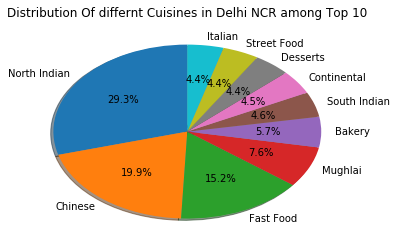

In [31]:
#printing top 10 Of Delhi NCR Cusinis which are present in most number of restaurants
i = 1
x = []
y = []
for key, value in sorted(cuisines_Delhi_NCR.items(), key=lambda item: item[1], reverse = True):
    print(i,"%s: %s" % (key, value))
    x.append(key)
    y.append(value)
    if i == 10:
        break;
    i += 1
    
#plot
plt.pie(y, labels = x,startangle=90, shadow = True, autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Distribution Of differnt Cuisines in Delhi NCR among Top 10")
plt.show()